In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# 1 - Read Data and do the Exploratory phase

In [5]:
df = pd.read_csv('adult.csv', header=None, sep=',\s')

In [6]:
df.shape

(32561, 15)

In [7]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']

df.columns = col_names

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Explore categorical variables

In [12]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [13]:
# view the categorical variables
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
# check missing values in categorical variables
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [15]:
# view frequency counts of values in categorical variables
for var in categorical: 
    print(df[var].value_counts())
    print(' ')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
 
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical      

In [16]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))
    print(' ')

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
 
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
 
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: floa

In [17]:
### There are some missing values coded as ? , lets recoded that properly
# check labels in workclass variable
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace('?', np.NaN, inplace=True)
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [20]:
### Do the same for the others
# replace '?' values in occupation variable with `NaN`
df['occupation'].replace('?', np.NaN, inplace=True)
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [21]:
# replace '?' values in native_country variable with `NaN`
df['native_country'].replace('?', np.NaN, inplace=True)
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [22]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [23]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


### Explore categorical variables

In [24]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [25]:
# view the numerical variables
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### All numerical variable are discrete data type

In [26]:
# check missing values in numerical variables
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### Save df before feature engineering

In [28]:
df.to_csv(r'base_df.csv', index = False, header=True)

### Read df's if needed

In [75]:
df = pd.read_csv('base_df.csv', sep=',', engine='python')

In [76]:
df.shape

(32561, 15)

# 2 - Feature Engineering

In [77]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [78]:
# display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [79]:
# display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [80]:
# print percentage of missing values in the categorical variables
df[categorical].isnull().mean()

workclass         0.056386
education         0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017905
income            0.000000
dtype: float64

In [81]:
# print categorical variables with missing data
for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

workclass 0.05638647461687295
occupation 0.056601455729246644
native_country 0.0179048555019809


In [82]:
# impute missing categorical variables with most frequent value
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True) 

In [83]:
df.shape

(32561, 15)

In [84]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
# check missing values in categorical variables
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [86]:
# check missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### All missing values are gone now. Lets save the data before Encode

In [88]:
df.to_csv(r'base_df_clean.csv', index = False, header=True)

### Read base if it's needed

In [117]:
df_clean = pd.read_csv('base_df_clean.csv', sep=',', engine='python')

## Encoding

In [118]:
df_clean[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [119]:
df_clean.shape

(32561, 15)

In [120]:
# Lets separete the income from the rest of the dataset
df_income = df_clean['income']

In [121]:
df_clean.drop(['income'], axis='columns', inplace=True)

In [122]:
df_clean['workclass'] = df_clean['workclass'].astype('category')
df_clean['education'] = df_clean['education'].astype('category')
df_clean['marital_status'] = df_clean['marital_status'].astype('category')
df_clean['occupation'] = df_clean['occupation'].astype('category')
df_clean['relationship'] = df_clean['relationship'].astype('category')
df_clean['race'] = df_clean['race'].astype('category')
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['native_country'] = df_clean['native_country'].astype('category')
df_clean = pd.get_dummies(df_clean)

In [123]:
#df_clean['income'] = in_df

In [124]:
df_clean.shape

(32561, 105)

In [125]:
df_clean.head(20)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 105 entries, age to native_country_Yugoslavia
dtypes: int64(6), uint8(99)
memory usage: 4.6 MB


In [127]:
type(df_clean)

pandas.core.frame.DataFrame

In [128]:
df_clean.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=105)

### Lets save the data before Scaling

In [129]:
df_clean.to_csv(r'base_df_encoded.csv', index = False, header=True)
df_income.to_csv(r'base_df_income.csv', index = False, header=True)

### Read base if it's needed

In [130]:
df_encoded = pd.read_csv('base_df_encoded.csv', sep=',', engine='python')
df_income = pd.read_csv('base_df_income.csv', sep=',', engine='python')

In [138]:
df_income.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


# 3 - Feature Scaling

In [131]:
from sklearn.preprocessing import RobustScaler

In [132]:
cols = df_encoded.columns

In [133]:
cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=105)

In [134]:
# Deixando base em escala   
df_scalled = pd.DataFrame(RobustScaler().fit_transform(df_encoded))
df_scalled.columns = cols
df_scalled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [135]:
df_scalled.shape

(32561, 105)

### Lets save the data before Spliting

In [136]:
df_scalled.to_csv(r'base_df_scalled.csv', index = False, header=True)

### Read base if it's needed

In [4]:
df_scalled = pd.read_csv('base_df_scalled.csv', sep=',', engine='python')
df_income = pd.read_csv('base_df_income.csv', sep=',', engine='python')

In [5]:
df_scalled.head(20)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
5,0.00,0.890978,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.60,-0.152394,-1.666667,0.0,0.0,-4.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
7,0.75,0.262414,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.30,-1.111982,1.333333,14084.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.25,-0.158584,1.000000,5178.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4 - Split data

In [6]:
X = df_scalled

y = df_income

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 105), (9769, 105))

# 5 - Create the Gaussian Naive Bayes classifier

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22792, 105), (22792, 1), (9769, 105), (9769, 1))

In [9]:
### Model training
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results 

In [10]:
X_test.head

<bound method NDFrame.head of         age    fnlwgt  education_num  capital_gain  capital_loss  \
22278 -0.50 -0.010375       0.000000           0.0           0.0   
8950  -0.50  0.319776       1.000000           0.0           0.0   
7838  -0.60  0.653451       0.666667           0.0           0.0   
16505  0.45 -0.257633      -2.333333           0.0        1902.0   
19140  0.40 -0.046417      -1.000000           0.0        2824.0   
...     ...       ...            ...           ...           ...   
21949  0.45  0.122517       1.000000           0.0        2415.0   
26405  1.35  1.763387       1.666667       15024.0           0.0   
23236  0.85  1.058629       1.000000        7688.0           0.0   
26823 -0.05 -0.739759       0.000000           0.0           0.0   
20721 -0.75 -0.797163      -0.333333           0.0           0.0   

       hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
22278             0.8                    0.0                  0.0   
8950           

In [11]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

## Check accuracy score

In [12]:
y_test.shape, y_pred.shape, X_test.shape

((9769, 1), (9769,), (9769, 105))

In [13]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8007


### Compare the train-set and test-set accuracy

In [14]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [15]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8005


## Check for overfitting and underfitting

In [16]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

print('These two values are quite comparable. So, there is no sign of overfitting.')

Training set score: 0.8005
Test set score: 0.8007
These two values are quite comparable. So, there is no sign of overfitting.


### Compare model accuracy with null accuracy

### Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [17]:
# check class distribution in test set
y_test.value_counts()

income
<=50K     7407
>50K      2362
dtype: int64

In [18]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


### We can see that our model accuracy score is 0.8007 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

# 6 - Confusion Matrix

### A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [19]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5914 1493]
 [ 454 1908]]

True Positives(TP) =  5914

True Negatives(TN) =  1908

False Positives(FP) =  1493

False Negatives(FN) =  454


<AxesSubplot:>

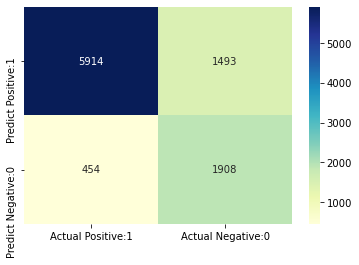

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 7 - Classification Metrices

### Classification Report

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7407
        >50K       0.56      0.81      0.66      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



### Classification Accuracy

In [22]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [23]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8007


### Classification Error

In [24]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1993


### Precision

### Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [25]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7984


### Recall

### Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [26]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9287


### True Positive Rate

### True Positive Rate is synonymous with Recall.

In [27]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9287


### False Positive Rate

In [28]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4390


### Specificity

In [29]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5610


### f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Support

Support is the actual number of occurrences of the class in our dataset.

# 8 - Probabilities 

In [30]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999395e-01, 6.05353099e-07],
       [9.99876582e-01, 1.23417847e-04],
       [1.47623238e-01, 8.52376762e-01],
       [1.64676937e-04, 9.99835323e-01],
       [7.77850812e-09, 9.99999992e-01],
       [9.47389623e-01, 5.26103766e-02],
       [9.99999923e-01, 7.72699759e-08],
       [9.99993105e-01, 6.89537553e-06],
       [9.95115733e-01, 4.88426712e-03],
       [9.99999996e-01, 4.23724596e-09]])

In [31]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,6.053531e-07
1,9.998766e-01,1.234178e-04
2,1.476232e-01,8.523768e-01
3,1.646769e-04,9.998353e-01
4,7.778508e-09,1.000000e+00
5,9.473896e-01,5.261038e-02
6,9.999999e-01,7.726998e-08
7,9.999931e-01,6.895376e-06
8,9.951157e-01,4.884267e-03
9,1.000000e+00,4.237246e-09


In [32]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([6.05353099e-07, 1.23417847e-04, 8.52376762e-01, 9.99835323e-01,
       9.99999992e-01, 5.26103766e-02, 7.72699759e-08, 6.89537553e-06,
       4.88426712e-03, 4.23724596e-09])

In [33]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

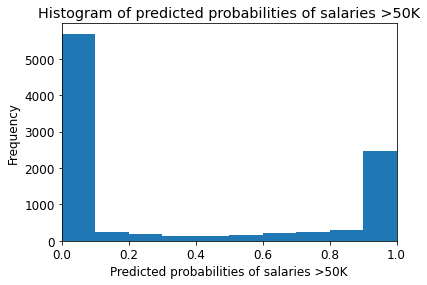

In [34]:
# plot histogram of predicted probabilities
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

### Majority of observations predcit that the salaries will be <=50K.

# 9 - ROC and AUC

### ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

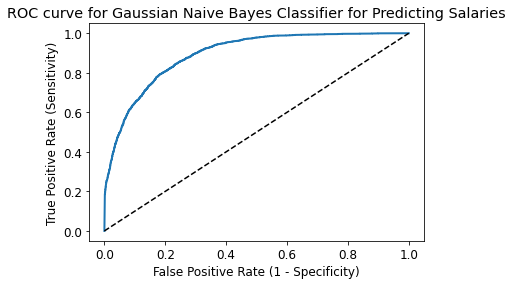

In [35]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [36]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8928


### Interpretation
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting the salaries.

# 10 - k-Fold Cross Validation

In [37]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80701754 0.7995614  0.80035103 0.80430013 0.79069767 0.79684072
 0.80473892 0.80649408 0.79640193 0.80430013]


In [38]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8011


### Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 80.70% accuracy to 79.06% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 0.8007, but the mean cross-validation accuracy is 0.8011. So, the 10-fold cross-validation accuracy does result in slightly better performance for this model.

# 11 - Conclusion

### To be abble to use the Classifiers we did: 
1. Cleared the missing data
2. Feature engineering
3. Enconding
4. Scaling
5. Split the data (train, test)

### And then after applied the NB Classifier we tested/used:

1. Test for overfitting
   <br>(The model accuracy was 80.05% in training and 80.07% in test, which indicates no overfitting.)
2. Create and checked the Confusion Matrix
3. Checked the Classification Metrics
4. We've ploted the Probabilities histogram
5. Interpretedd the ROC and AUC
6. K-folding for better

### After this analisys we concluded that the Gaussian Naïve Bayes Classifier works very well with this dataset. 

The training-set accuracy score is 0.8005 while the test-set accuracy to be 0.8007. These two values are quite comparable. So, there is no sign of overfitting

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.

Our original model accuracy is 0.8007, but the mean cross-validation accuracy is 0.8011. So, the 10-fold cross-validation accuracy does result in slightly better performance for this model.
